In [19]:
import FinanceDataReader as fdr
import pandas as pd
import pandas_ta as ta
import numpy as np
import plotly.graph_objects as go
from scipy import stats
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import hdbscan
from sklearn.preprocessing import RobustScaler
from pykrx import stock

#plt.style.available
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context('talk')

%matplotlib inline

In [20]:
import warnings
warnings.filterwarnings('ignore')

## Version 2 

### 1. Check Market Trading Value By date

#### 1.1 Filter 기능 추가

- KOSPI (우선순위 => 외국인/기관)
- KOSDAQ (우선순위 =>기관/외국인/개인 순으로 선정함)

In [22]:
# import pandas as pd
# import numpy as np
# import requests
# import lxml
# from bs4 import BeautifulSoup
# from requests import Response

# def crawl_trends(code):
#     headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}
#     trends = pd.DataFrame()

#     for i in range(1,25):
#         url = 'https://finance.naver.com/item/frgn.naver?code=' + code + "&page=" + str(i) + "&trader_day=1"
#         res = requests.get(url, headers = headers)
#         page_soup = BeautifulSoup(res.text, "lxml")
#         trends_html = page_soup.select_one('div.section.inner_sub > table.type2')

#         date_data = np.array([item.get_text().strip() for item in trends_html.select('td.tc')])
#         col_data = np.array([item.get_text().strip() for item in trends_html.select('th')])
#         col_data = np.delete(col_data,(0,7,8))
#         trends_data = np.array([item.get_text().strip() for item in trends_html.select('td.num')])

#         trends_data.resize(len(date_data),len(col_data))
#         trend = pd.DataFrame(trends_data[0:,0:],index = date_data, columns = col_data)
#         trends = pd.concat([trends,trend])
#     return trends


# crawl_trends("032500")

In [24]:

# nepass='330860';kmw="032500";samsin="263810";ek="161000";pmt="137400";nh="025860";ap="211270";eco="086520";lb="376190";bgf="027410"
# samsung="005930";hm="067310"
# code=eco;start_date="20240101";end_date="20240527"
# drop_cols=['기타법인','전체']
# rename={'외국인합계':'외국인','기관합계':'기관'}
#nepass=Stock(code=code,start_date=start_date,end_date=end_date,drop_cols=drop_cols,rename=rename,market='NASDAQ')
# df=nepass.get_market_trading()
# #df_tr=stock.get_market_trading_value_by_date(start_date,end_date,code)
# df_pr=stock.get_market_ohlcv(start_date,end_date,code)

# vol=df['거래량']
# vol=df['거래량']/1000000



from os import terminal_size


# def check_cnts(vol,upper_cut):
    
#     cnts=0

#     for i in range(1,len(vol)-1):
#         if vol[i]>upper_cut and vol[i]>vol[i-1] and vol[i]>vol[i+1]:
#             cnts+=1
#     return cnts

# def check_eligibility(vol,days=5):
#     threshold=2
#     median=vol.median()
#     upper_cut=median+threshold*np.median(abs(vol-median))
#     cnts=check_cnts(vol,upper_cut)
    
#     if cnts>0:
#         metric=np.std(abs(vol[-days:])-upper_cut)
#         return metric
#     return np.nan
        

# # nepass='330860';kmw="032500";samsin="263810";ek="161000";pmt="137400";nh="025860";ap="211270";eco="086520";lb="376190";bgf="027410"
# # samsung="005930";hm="067310"        

# codes={'nepass':'330860',"kmw":"032500","samsin":"263810","ek":"161000","pmt":"137400","ap":"211270",
#        "eco":"086520","bgf":"027410","hm":"067310","hmm":"011200","mirae":"049950","top_mat":"360070","nh":"025860"}
# start_date="20240101";end_date="20240617"
# for name,code in codes.items():
#     df=stock.get_market_ohlcv(start_date,end_date,code)
#     vol=df['거래량']/1000000
#     result=check_eligibility(vol)
#     print("name:{0}--->result:{1}".format(name,result))
#     print("")




drop_cols=['기타법인','전체']
rename={'외국인합계':'외국인','기관합계':'기관'}
start_date="20240101";end_date="20240617"
code="025860",


df = stock.get_market_trading_volume_by_date("20210115", "20210122", "005930")
df

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2021-01-15,-5006115,288832,7485785,-2768502,0
2021-01-18,505669,262604,151228,-919501,0
2021-01-19,1139258,-34023,-2044543,939308,0
2021-01-20,-4157919,262408,4917655,-1022144,0
2021-01-21,-712099,-321732,2890389,-1856558,0
2021-01-22,-6384793,56478,9884815,-3556500,0


In [25]:



def magnitude_warp(data,loc=1.1,sigma=0.05):
    factor = np.random.normal(loc=loc, scale=sigma)
    return data * factor

def jitter(data,loc=1,sigma=0.01):
    noise = np.random.normal(loc=loc, scale=sigma)
    return np.floor(data + noise)


def augment(data,lags=10,sigma_magnitude_warp=0.01, sigma_jitter=0.01,loc_magnitue=1.1,loc_jitter=1):
    time_data=np.array(data[-lags:])
    augmented_data=data.copy()
    for t in time_data:
        t=magnitude_warp(t,sigma=sigma_magnitude_warp,loc=loc_magnitue)
        t=jitter(t,sigma=sigma_jitter,loc=loc_jitter)
        augmented_data.append(t)
    return augmented_data





def check_tracking_trend(interval,price):
    pass



class Stock:
    def __init__(self,code:str,start_date:str,end_date:str,drop_cols:list,rename:dict,market:str,term_selections:list):
        self.code=code
        self.start_date=start_date
        self.end_date=end_date
        self.drop_cols=drop_cols
        self.rename=rename
        self.market=market
        self.time_trading_data=self.get_market_trading()
        self.term_selections=sorted(term_selections)
        

    @staticmethod
    def change_value(num1:float,num2:float):
        return (num1-num2)/abs(num2)
    

    @staticmethod
    def count_peaks_above_threhold(vol):
        cnts=0
        for i in range(1,len(vol)-1):
            if vol[i]>upper_cut and vol[i]>vol[i-1] and vol[i]>vol[i+1]:
                cnts+=1
        return cnts
    


    
    @staticmethod
    def stock_decorator(func):    
        def wrapper(*args,**kwargs):
            vol=kwargs['vol']
            cnts=0
            threshold=2
            median=vol.median()
            upper_cut=vol.median()+threshold*np.median(abs(vol-median))

            for i in range(1,len(vol)-1):
                if vol[i]>upper_cut and vol[i]>vol[i-1] and vol[i]>vol[i+1]:
                    cnts+=1
            
            if cnts>0:
                return func(vol=vol,upper_cut=upper_cut,scope=kwargs['scope'],threshold=kwargs['threshold'])
            return "not distict movement"
        return wrapper


    @staticmethod
    @stock_decorator
    def check_eligibility(vol,scope=5,threshold=2,upper_cut=0.0):
        metric=np.std(abs(vol[-scope:])-upper_cut)
        if metric>0:
            if metric>=1 and metric<3:
                return "accepted-slight potential"
            elif metric>=3:
                return "watching-high potential"
        else:
            return "accepted-low potential"
    
    


    
    
    def get_market_trading(self):
        df_tr=stock.get_market_trading_value_by_date(self.start_date,self.end_date,self.code)
        df_pr=stock.get_market_ohlcv(self.start_date,self.end_date,self.code)
        
        #merge data
        df=pd.concat([df_tr,df_pr],axis=1)
        del df_tr,df_pr


        data=self.preprocess(df)
        return data
    


    
    
    def preprocess(self,data:pd.DataFrame):
    
        if self.drop_cols:
            data=data.drop(columns=self.drop_cols)
        
        if self.rename:
            data=data.rename(columns=self.rename)
        
        return data
        
    

    def check_opt_001(self):
        
    
        data=self.time_trading_data[['기관','외국인','개인']]    

  
        
        #sort the date in asceding order

    
        #compute key metrics according to the type of periods
        short_m=data[::-1][:self.term_selections[0]].sum()/1000000
        middle_m=data[::-1][:self.term_selections[1]].sum()/1000000
        long_m=data[::-1][:self.term_selections[2]].sum()/1000000


        # compute the change in values 
        change_long=self.change_value(short_m,long_m)
        change_middle=self.change_value(short_m,middle_m)

        
      
        #In the case of KOSDARQ, we place more weight on the movment of institution over any others
        #On the other hand, KOSPI, the trading volume of foreginer is always most vital 
        if self.market=="KOSDAQ":
            if change_long['기관'] >1 or change_middle['기관']>1:
              
                if short_m['기관']>0 and any(short_m[['외국인','개인']]>0):
                    return True
                
        elif self.market=="KOSPI":
        
            if change_long['외국인'] >1 or change_middle['외국인']>1:
                if short_m['외국인']>0 and any(short_m[['기관','개인']]>0):
                    
                    return True
        
        return False
    




    
    # check if we have abnormal tradning volume within a given interval
    # return true only if we have more than one "outstadning" volume
    # the interval of your interst: scope[0]
    # the period during which the frequency test is computed: scope[1]
    def check_opt_002(self,scopes,threshold=2):
        
        vol=self.time_trading_data['거래량'][-scopes[0]:]
        # if result is True, then we proceed to do extra work
        result=self.check_opt_001()
       
        if result:
            return self.check_eligibility(vol=vol,scope=scopes[1],threshold=threshold,upper_cut=0.0)
            
            
        else:
            return "rejected-no comment"
        

    
        
    #seek the trend of stocks to predict what the future movement is like  in the near future. 
    def check_opt_003(self,loc_magnitue,loc_jitter,lags=10,sigma_magnitue=0.01,sigma_jitter=0.01):
        augmented_data=self.time_trading_data['종가'].tolist()
        time_data=augmented_data[-lags:]
        for t in time_data:
            t=magnitude_warp(t,sigma=sigma_magnitue,loc=loc_magnitue)
            t=jitter(t,sigma=sigma_jitter,loc=loc_jitter)
            augmented_data.append(t)


        

        
        return augmented_data

 
            
        




        
        
codes={'nepass':'330860',"kmw":"032500","samsin":"263810","ek":"161000","pmt":"137400","ap":"211270","mirae":"049950","top_mat":"360070"}
        
codes={"ek":"161000","pmt":"137400","ap":"211270","mirae":"049950","top_mat":"360070"}
start_date="2024-01-14";end_date="2019-08-16"
drop_cols=['기타법인','전체']
rename={'외국인합계':'외국인','기관합계':'기관'}
term_selections=[5,20,30]
scopes=[60,20]
code=codes['ek']
st=Stock(code=code,start_date=start_date,end_date=end_date,drop_cols=drop_cols,rename=rename,market='KOSPI',term_selections=term_selections)




augmented_data,price=st.check_opt_003(loc_jitter=1.2,loc_magnitue=1.0),st.time_trading_data['종가']
st.check_opt_002(scopes=scopes)

KeyError: "['기타법인', '전체'] not found in axis"

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2021-01-15,-5006115,288832,7485785,-2768502,0
2021-01-18,505669,262604,151228,-919501,0
2021-01-19,1139258,-34023,-2044543,939308,0
2021-01-20,-4157919,262408,4917655,-1022144,0
2021-01-21,-712099,-321732,2890389,-1856558,0
2021-01-22,-6384793,56478,9884815,-3556500,0


In [11]:


close_fft=np.fft.fft(np.array(augmented_data))
fft_df=pd.DataFrame({'fft':close_fft})
fft_df['absoulte']=abs(fft_df)
fft_df['angle']=fft_df['fft'].map(lambda x:np.angle(x))


num_=5
fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
fft_list_final=np.fft.ifft(fft_list_m10)


plt.figure(figsize=(14, 7), dpi=100)
plt.plot(np.asarray(price),  label='Real')
plt.plot(fft_list_final)


# for num_ in [5,6]:
#     fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
#     plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))


plt.legend()
plt.show()




NameError: name 'augmented_data' is not defined

In [23]:
def track_trend(index,array_of_data,order=1):
    
    results=np.polyfit(index,array_of_data,order)
    slope=results[-2]
    movement=-1 if float(slope)<0 else 1
    above_zero=-1  if array_of_data[-1]<0 else 1

    return above_zero,movement

In [50]:
from numpy.polynomial import Polynomial
index=np.arange(0,len(augmented_data[-50:]))


track_trend(index,augmented_data[-50:],order=1)


## 여기까지 학습


(1, -1)

## 1. Support and Resistance Level (연구용)




In [27]:
df=yf.download("^GSPC",start="2020-08-01")
df.drop(columns=['Adj Close'],inplace=True)

NameError: name 'yf' is not defined

[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_1083/134890097.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  condition=df[col_price][index]>=np.max(df[col_price][start:end])*(1-scale)
/tmp/ipykernel_1083/134890097.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_low=df[col_price][index]
/tmp/ipykernel_1083/134890097.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.hlines(level[1], xmin=df['Date'][level[0]], xmax=max(df['Date']), colors='sil

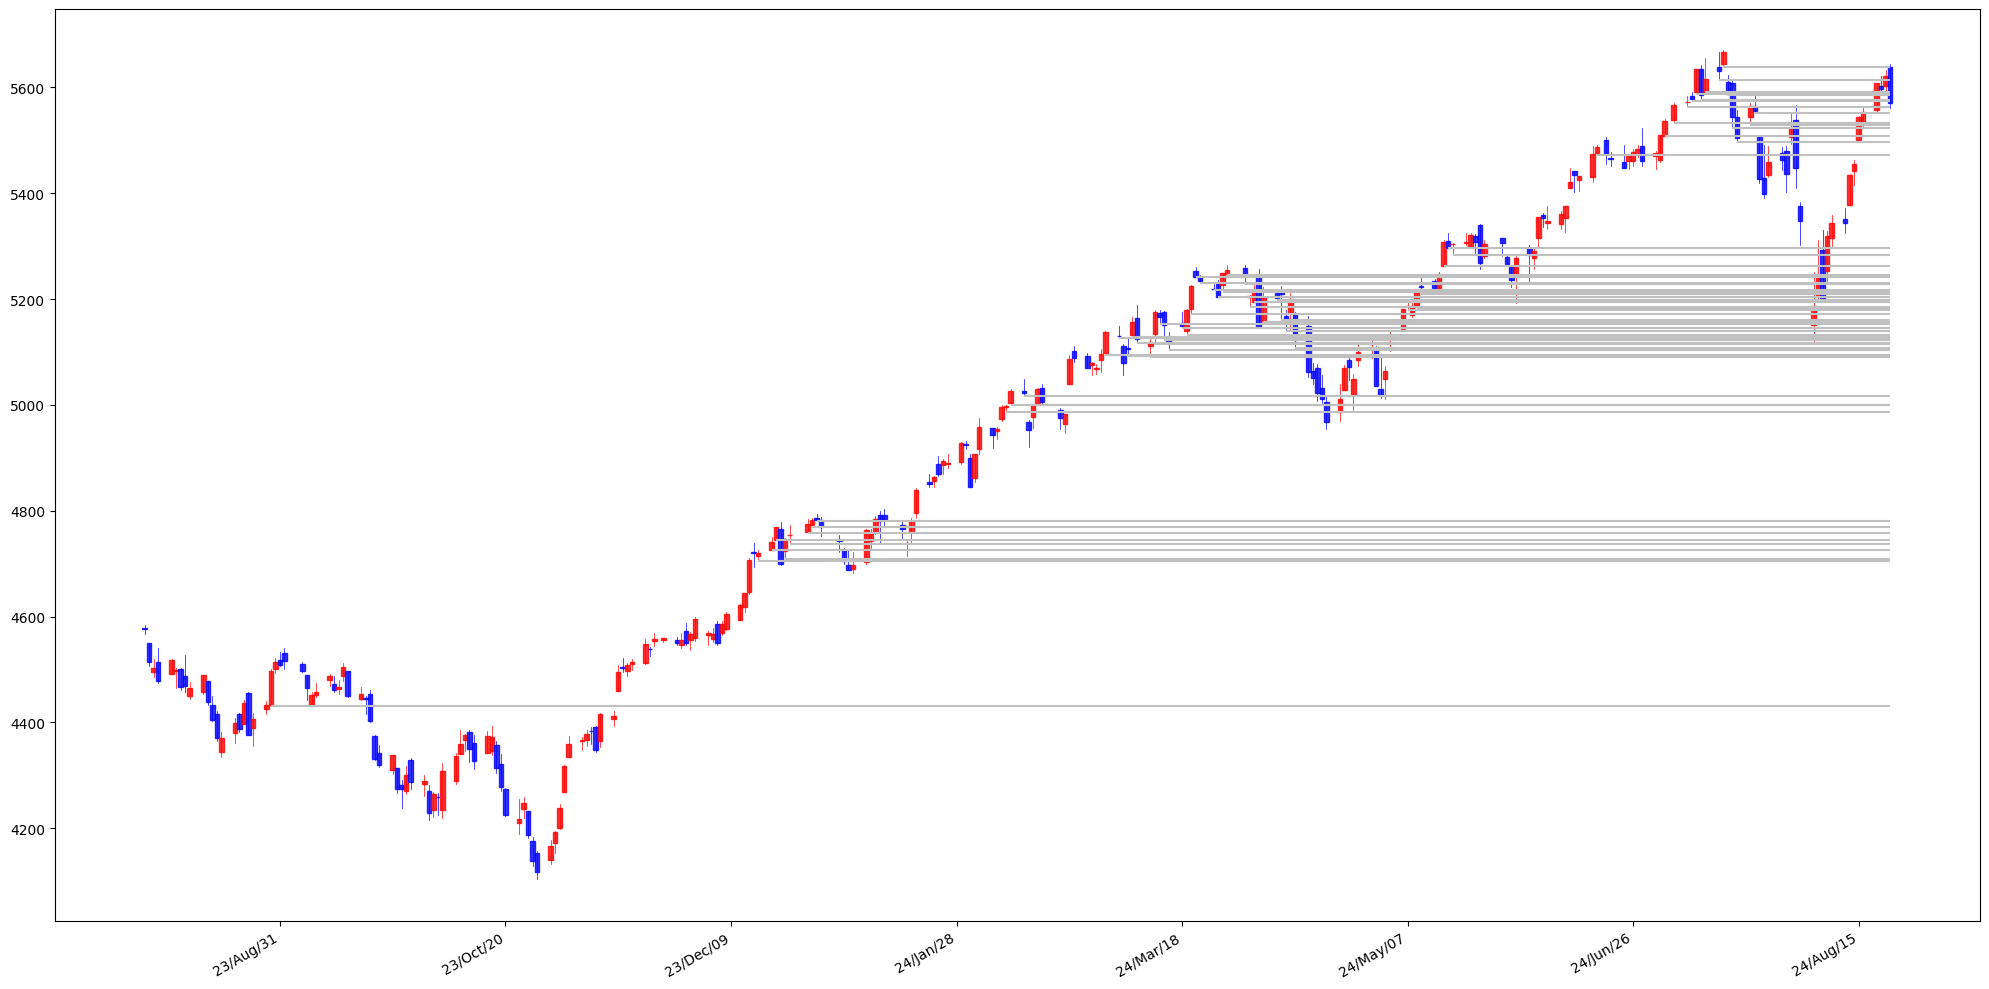

In [25]:
all([True,True])

True